# Принятие решений в бизнесе
# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

Данные для первой части
Файл /datasets/hypothesis.csv. 

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv. 

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста
    
### задачи проекта:     
Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
  - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
  - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
  - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
    
Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача
Проанализируйте A/B-тест:

    1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
    5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
    6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
    11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
    13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Загрузим данные и подготовим их к анализу

In [ ]:
#импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#откроем таблицу
visitors = pd.read_csv(
    '/datasets/visitors.csv', sep=','
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
#откроем таблицу
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
#откроем таблицу
pd.options.display.max_colwidth = 150
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**При ознакомлении с таблицами данных:** Таблица **orders** содержит информацию о заказах. **visitors** хранит дату, группу и количество пользователей в указанную дату в указанной группе A/B-теста.   В **hypothesis** 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [ ]:
#изучим типы колонок
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

In [ ]:
#изучим типы колонок
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [ ]:
#изучим типы колонок
hypothesis.dtypes

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Efforts        int64
dtype: object

Все типы данных соответствуют их содержанию.

In [ ]:
#изучим пропуски в значениях 
visitors.isna().mean()

date        0.0
group       0.0
visitors    0.0
dtype: float64

In [ ]:
#изучим пропуски в значениях 
orders.isna().mean()

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [ ]:
#изучим пропуски в значениях 
hypothesis.isna().mean()

Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64

Пустых значений в таблицах нет.

In [ ]:
#проверим число заказов  в группах
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [ ]:
#проверим распределение по группам
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [ ]:
#количество уникальных пользователей
orders['visitorId'].nunique()

1031

In [ ]:
#посчитаем число строк в таблице
len(orders['visitorId'])

1197

In [ ]:
#найдем количество пользователей, которые присутствуют и группе А и в группе В
len(np.intersect1d(orders.query('group=="A"')['visitorId'].unique(),\
                   orders.query('group=="B"')['visitorId'].unique()))

58

Возможно, одни и е же пользователи попали в две группы теста-их 58 человек - это говорит об ошибке в сборе данных. Удаление этих пользователей повлияет на конверсию, поскольку мы можем удалить этих пользователей из таблицы с заказами, но не можем удалить из таблицы с визитами, так ка там данные агрегированы за день. Принято решение не удалять пользователей, попавших в обе группы.

In [ ]:
#проверим на наличие дубликатов в таблице
visitors.duplicated().sum()

0

In [ ]:
#проверим на наличие дубликатов в таблице
orders.duplicated().sum()

0

In [ ]:
#проверим на наличие дубликатов в таблице
hypothesis.duplicated().sum()

0

Дубликатов  в таблицах нет.

In [ ]:
#определим временные рамки теста
display('Начало теста:',orders['date'].min())
display('Конец теста:', orders['date'].max() )

'Начало теста:'

Timestamp('2019-08-01 00:00:00')

'Конец теста:'

Timestamp('2019-08-31 00:00:00')

In [ ]:
display('В группе A число пользователей:',\
        orders.query('group=="A"')['visitorId'].nunique())
display('В группе В число пользователей:',\
        orders.query('group=="B"')['visitorId'].nunique())

'В группе A число пользователей:'

503

'В группе В число пользователей:'

586


При анализе таблиц установили, что групп две :А и В.
    
Определили, что начало теста приходится на дату - 2019-08-01,
    а конец - 2019-08-31.
В группе A число пользователей:503

В группе В число пользователей:586  

В группе В больше число пользователей.
Общее число уникальных пользователей как раз составляет 1031, если вычесть 58 аномальных пользователей. Без вычета-1089 человек.


## Часть. Приоритизация гипотез.

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [ ]:
#воспользуемся методом приоритезации ICE
pd.options.display.max_colwidth = 100
hypothesis['ICE'] = round((hypothesis['Impact']*hypothesis['Confidence'])/\
                          hypothesis['Efforts'],2)
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективны гипотезы по методу ICE 8,0,7.

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [ ]:
#воспользуемся методом приоритезации RICE
pd.options.display.max_colwidth = 120
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективны гипотезы по методу RICE 7,2,0,6.

    
Считали так: ICE=Impact*Confidence/Efforts,

где Impact -насколько сильно изменение повлияло на пользователей, их опыт и удовлетворение от продукта.
    
Confidence -насколько уверены, что это изменение повлияло на пользователей именно так.
    
Efforts -сколько стоит протестировать эту гипотезу

Наиболее перспективны гипотезы по методу **ICE 8,0,7**:
- 8 	Запустить акцию, дающую скидку на товар в день рождения -	16.2
- 0 	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей -	13.3
- 7 	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок -	11.2

RICE=Reach*Impact*Confidence/Efforts
 
 Reach - скольких пользователей затронет изменение, которое мы хотим внести.
    
 Impact - насколько сильно изменение повлияло на пользователей, их опыт и удовлетворение от продукта.
    
 Confidence - насколько уверены, что это изменение повлияло на пользователей именно так.
    
 Efforts -сколько стоит протестировать эту гипотезу

Наиболее перспективны гипотезы по методу **RICE 7,2,0,6**.
- 7 	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок -	112.0
- 2 	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа -	56.0
- 0 	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей -	40.0
- 6 	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию -	40.0


Изменилась приоритизация гипотез при применении RICE вместо ICE, охваты пользователей, использованные в методе RICE повлияли на изменения. 


## Часть. Анализ A/B-теста

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.


In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [ ]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                    orders['group'] == x['group'])].agg({'date':'max', 'group':'max',\
                                'transactionId':'nunique', 'visitorId':'nunique', 'revenue' : 'sum'}), axis=1)\
                                .sort_values(by=['date','group'])

In [ ]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                         visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                       .sort_values(by=['date','group'])

In [ ]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

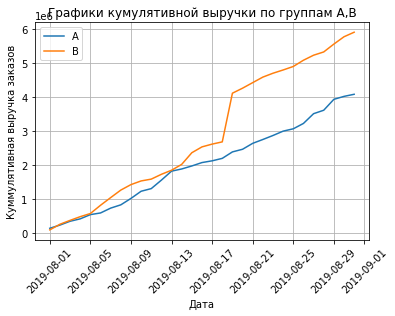

In [ ]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

plt.title('Графики кумулятивной выручки по группам А,B')
plt.xlabel('Дата')
plt.ylabel('Куммулятивная выручка заказов')
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()

По **Графику кумулятивной выручки** видно , что оба значения групп А и В ростут приблизитльно в одном диапазоне где-то до 17 августе, по после которого значение группы В имеет явный скачок. Кумулятивная выручка  у группы В больше на протяжении всего времени.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

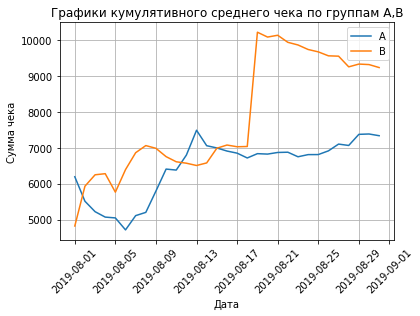

In [ ]:
#Построим графики среднего чека по группам
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Графики кумулятивного среднего чека по группам А,B')
plt.xlabel('Дата')
plt.ylabel('Сумма чека')
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()

По **Графику кумулятивного среднего чека по группам А,B** отметим, что Средний чек группы В выше на протяжении всего периода, кроме начала месяца и 13 августа. Виден, также резкий скачок после 17 августа, что говорит об резком увеличении среднего чека в группе В.С последующим медленным спадом. В группе А идет сначала спад с начала месяца до 06 августа, а затем увеличени кумулятивного среднего чека до 13 августа. Далее значение колеблется вдоль одной суммы в 7000. Графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения

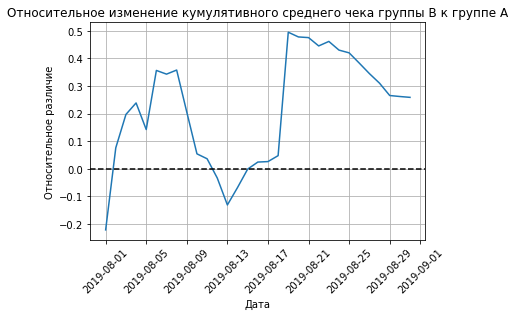

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',\
                                                   right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()

По графику **Относительного изменения кумулятивного среднего чека группы B к группе A**  видно, что средний чек группы В выше везде, кроме начала месяца и 13 августа.В нескольких точках график различия между сегментами резко «скачет». Возможно, имеются крупные заказы и выбросы.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

In [ ]:
# считаем кумулятивное среднего количество заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [ ]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [ ]:
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

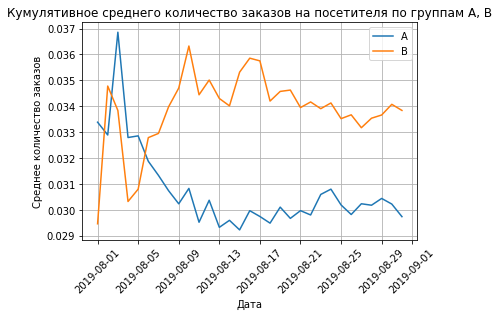

In [ ]:
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднего количество заказов на посетителя по группам А, В')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()

Видим по графику **Кумулятивного среднего количества заказов на посетителя по группам А, В** , что значения находятся в диапазоне от 2,9 до 3,7.В начале кумулятивное среднее количество заказов имеет пиковые значения в обоих группах,  у  группы А больше,но затем пошла на спад с 05 августа и колеблется в одном диапазоне, а у группы В наблюдается также плавный спад.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].\
  merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

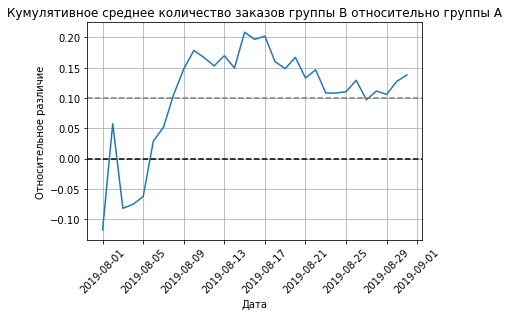

In [ ]:
#Построим график относительного различия кумулятивных конверсий
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/\
    mergedCumulativeConversions['conversionA']-1) 

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.title('Кумулятивное среднее количество заказов группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()

По графику **Кумулятивное среднее количество заказов группы B относительно группы A** видно, что в начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и находилась в одном диапазоне, не ниже прироста в 10% относительного группы А.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [ ]:
#Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

In [ ]:
#выведем  количество заказов по пользователям
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 11,9,8 и 5 заказов.

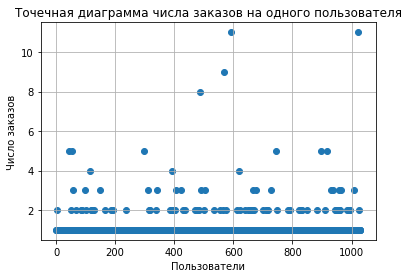

In [ ]:
#Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Число заказов')
plt.grid(True)

plt.show()

По **Точечной диаграмме числа заказов на одного пользователя** много пользователей с 1 и 2 заказами, с 3-мя уже меньше значительно. И есть выбивающиеся заказы в районе 8,9,11.

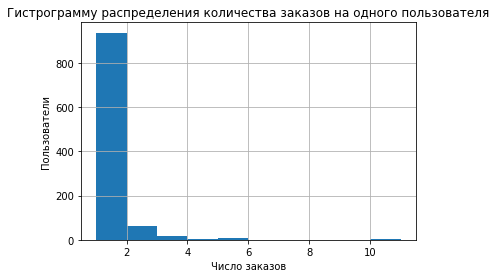

In [ ]:
#Построим гистрограмму распределения количества заказов на одного пользователя
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмму распределения количества заказов на одного пользователя')
plt.ylabel('Пользователи')
plt.xlabel('Число заказов')
plt.grid(True)
plt.show()

По **Гистрограмме распределения количества заказов на одного пользователя** также видно, что оснавная масса пользователей совершает больше всего едоничных покупок, значительно меньше уже по 2 покупки, остальные еще меньше.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [ ]:
#Посчитаем выборочные перцентили количества заказов на одного пользователя
print(np.percentile(ordersByUsers['orders'], [ 95, 99])) 

[2. 4.]


По посчитанным **95-й и 99-й перцентилям количества заказов на пользователя** получили, что Не более 5% пользователей оформляли 2 заказов. И 1% пользователей заказывали более 4 раз. 
Разумно выбрать 2  заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.


### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

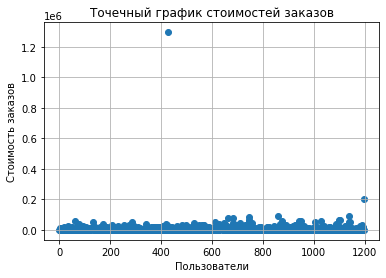

In [ ]:
#Построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.grid(True)
ylim
plt.show()

По **Точечному графику стоимостей заказов** видно, что имеются выбивающиеся из основной массы значения. В основном, стоимость большинства заказов находится в диапазоне до 20 000.

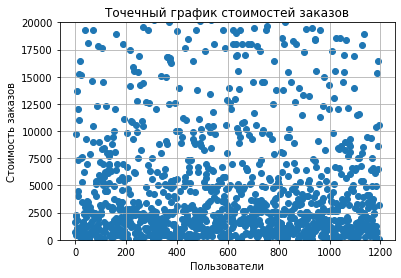

In [ ]:
#Построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.ylim(0,20000)
plt.grid(True)

plt.show()

По **Точечному графику стоимостей заказов до 20 000** видно, что очень много заказов на рубеже до 2500, по 7500 уже значительно меньше пользователей совершает покупки.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [ ]:
#Определим  95 и 99 перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

По посчитанным **95-й и 99-й перцентилям стоимости заказов** получили, что 5% совершили заказ на 28 000, и лишь 1% на 58233.2. 

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия в среднем между группами есть.


In [ ]:
# Проверим, нормально ли распределены стоимости заказов
alpha = 0.05  # критический уровень статистической значимости

results = stats.shapiro(x_values)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  9.431352044110174e-19
Отвергаем нулевую гипотезу: распределение не нормально


    
**Применим тест Манна-Уитни.**
    
Главное отличие этого непараметрического метода в том, что он работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к нему прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты. А выбросы  у нас есть. 
    
  И второе условие тоже есть - распределение стоимости заказов не нормально.
    


In [ ]:
#количество заказов в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [ ]:
# количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [ ]:
#количество заказов в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [ ]:
## количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [ ]:
#ordersPerDateA — количество заказов в выбранную дату в группе A;
#revenuePerDateA — суммарная выручка в выбранную дату в группе A;
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [ ]:
#ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
#revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [ ]:
#ordersPerDateB — количество заказов в выбранную дату в группе B;
#revenuePerDateB — суммарная выручка в выбранную дату в группе B;
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [ ]:
#ordersCummulativeB — суммарное число заказов до выбранной даты включительно в группе B;
#revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [ ]:
#объединим данные в один датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [ ]:
#Создадим переменную ordersByUsersA со столбцами ['userId', 'orders'] для группы А 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [ ]:
#Создадим переменную ordersByUsersВ со столбцами ['userId', 'orders']для группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [ ]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
#Выведем относительный прирост среднего числа заказов группы B
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

p-value: 0.017


In [ ]:
#Выведем относительный прирост среднего числа заказов группы B по отношению к группе А
print('Относительная разница между сравниваемыми величинами:',\
        "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Относительная разница между сравниваемыми величинами: 0.138


Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть. 
Первое число — p-value = 0.017 меньше 0.05. 

Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет,  отвергаем. Однако относительный выигрыш группы B равен 13.8% — второе число в выводе.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть

In [ ]:
#Рассчитаем статистическую значимость различий в среднем чеке
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']\
                                          ['revenue'], orders[orders['group']=='B']['revenue'])[1]))

p-value: 0.729


In [ ]:
#найдём относительные различия в среднем чеке между группами
print('Относительная разница между сравниваемыми величинами:',\
        '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].\
                         mean()/orders[orders['group']=='A']['revenue'].mean()-1))

относительная разница между сравниваемыми величинами: 0.259


P-value значительно больше 0.05. Значит, **причин отвергать нулевую гипотезу** и считать, что в среднем чеке есть различия, **нет**. Впрочем, средний чек группы B выше среднего чека группы A на  25,9%.

Напомним, что найденные  95-й и 99-й перцентили средних чеков равны 28 000 и 58 233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

**Примем за аномальных пользователей** тех, кто совершил **больше 2 заказов** или совершил заказ **дороже 28 000 рублей**. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей

In [ ]:
x=2 #число покупок для верхней границы
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(x, 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(x, 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


74 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [ ]:
#отношение количества аномальных пользователей к общем количеству пользователей
print('Oтносительные потери составляют(%):',\
        round(((len(abnormalUsers)/orders['visitorId'].nunique())*100), 2))

Oтносительные потери составляют(%): 7.18



Oтносительные потери после удаления 74 аномальных пользователей составляют: 7.18%
  

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [ ]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница между сравниваемыми величинами:',\
      '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.013
Относительная разница между сравниваемыми величинами: 0.173


После очищения от аномальных выбросов результаты **по среднему количеству заказов** практически не изменились. Было 0.017 стало 0,013. Разница между сегментами: было 0,138 стало 0,173. т.е незначительно увеличилось количество заказов в группе В по отношению к группе А.

In [ ]:
#результаты по среднему чеку
print('p-value:'
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница между сравниваемыми величинами:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value:0.738
Относительная разница между сравниваемыми величинами: -0.020


После очищения от аномальных выбросов результаты **по среднему чеку** P-value увеличился, Было 0.729 стало 0,738. Но и разница между сегментами изменилась. Было 0.259 стало -0,020. Т.е. аномально большая сумма заказов была в группе В, что искажало общую картину. После удаления информации об этих заказах, видно, что средний чек в группе В ниже, чем у группы А на 20%.

### Выводы
Подготовим список гипотез для увеличения выручки в интернет-магазине.

**При ознакомлении с таблицами данных:** Таблица **orders** содержит информацию о заказах. **visitors** хранит дату, группу и количество пользователей в указанную дату в указанной группе A/B-теста.   В **hypothesis** 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Привели все данные к нужному типу данных. Обнаружили. что пустых значений в таблицах нет, дубликатов нет. Однако,  одни и е же пользователи попали в две группы теста-их 58 человек - это говорит об ошибке в сборе данных. Удаление этих пользователей повлияет на конверсию, поскольку мы можем удалить этих пользователей из таблицы с заказами, но не можем удалить из таблицы с визитами, так ка там данные агрегированы за день. Принято решение не удалять пользователей, попавших в обе группы.

Наиболее перспективны гипотезы по методу **ICE 8,0,7**:
- 8 	Запустить акцию, дающую скидку на товар в день рождения -	16.2
- 0 	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей -	13.3
- 7 	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок -	11.2

Наиболее перспективны гипотезы по методу **RICE 7,2,0,6**.
- 7 	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок -	112.0
- 2 	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа -	56.0
- 0 	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей -	40.0
- 6 	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию -	40.0

Изменилась приоритизация гипотез при применении RICE вместо ICE, охваты пользователей, использованные в методе RICE повлияли на изменения.

По **Графику кумулятивной выручки** увидели , что оба значения групп А и В ростут приблизитльно в одном диапазоне где-то до 17 августе, по после которого значение группы В имеет явный скачок. Кумулятивная выручка  у группы В больше на протяжении всего времени.

По **Графику кумулятивного среднего чека по группам А,B** отметили, что Средний чек группы В выше на протяжении всего периода, кроме начала месяца и 13 августа. Виден, также резкий скачок после 17 августа, что говорит об резком увеличении среднего чека в группе В.С последующим медленным спадом. В группе А идет сначала спад с начала месяца до 06 августа, а затем увеличени кумулятивного среднего чека до 13 августа. Далее значение колеблется вдоль одной суммы в 7000. Графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

По графику **Относительного изменения кумулятивного среднего чека группы B к группе A**  видно, что средний чек группы В выше везде, кроме начала месяца и 13 августа.В нескольких точках график различия между сегментами резко «скачет». Возможно, имеются крупные заказы и выбросы.

Отметили по графику **Кумулятивного среднего количества заказов на посетителя по группам А, В** , что значения находятся в диапазоне от 2,9 до 3,7.В начале кумулятивное среднее количество заказов имеет пиковые значения в обоих группах,  у  группы А больше,но затем пошла на спад с 05 августа и колеблется в одном диапазоне, а у группы В наблюдается также плавный спад.

По графику **Относительного прироста конверсии группы B относительно группы A** видели, что в начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и находилась в одном диапазоне.

Выявили, что есть пользователи, которые совершали и по 11,9,8 и 5 заказов.

По **Точечной диаграмме числа заказов на одного пользователя** много пользователей с 1 и 2 заказами, с 3-мя уже меньше значительно. И есть выбивающиеся заказы в районе 8,9,11.

По **Гистрограмме распределения количества заказов на одного пользователя** также видели, что оснавная масса пользователей совершает больше всего едоничных покупок, значительно меньше уже по 2 покупки, остальные еще меньше.

По посчитанным **95-й и 99-й перцентилям количества заказов на пользователя** получили, что Не более 5% пользователей оформляли 2 заказов. И 1% пользователей заказывали более 4 раз. 
Разумно выбрать 2  заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

По **Точечному графику стоимостей заказов** видно, что имеются выбивающиеся из основной массы значения. В основном, стоимость большинства заказов находится в диапазоне до 20 000.

По **Точечному графику стоимостей заказов до 20 000** видно, что очень много заказов на рубеже до 2500, по 7500 уже значительно меньше пользователей совершает покупки.

По посчитанным **95-й и 99-й перцентилям стоимости заказов** получили, что 5% совершили заказ на 28 000, и лишь 1% на 58233.2. Выявили 74 аномальных пользователей. Oтносительные потери после удаления 74 аномальных пользователей составили: 7.18%. Узнали, как их действия повлияли на результаты теста.

**Применим тест Манна-Уитни.**
Главное отличие этого непараметрического метода в том, что он работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к нему прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты. А выбросы  у нас есть. 
    
  И второе условие тоже есть - распределение стоимости заказов не нормально.

Посчитали **статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей**.

- Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет.

- Альтернативная: различия в среднем между группами есть.

Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть. 
Первое число — p-value = 0.017 меньше 0.05. 

Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет,  отвергаем. Однако относительный выигрыш группы B равен 13.8% — второе число в выводе.

Проверили **статистическую значимость различий в среднем чеке между сегментами**. 

- Нулевая гипотеза: различий в среднем чеке между группами нет. 

- Альтернативная гипотеза: различия в среднем чеке между группами есть

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B выше среднего чека группы A на 25,9%.

Приняли за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

После очищения от аномальных выбросов результаты **по среднему количеству заказов** практически не изменились. Было 0.017 стало 0,013. Разница между сегментами: было 0,138 стало 0,173.т.е незначительно увеличилось количество заказов в группе В по отношению к группе А.

После очищения от аномальных выбросов результаты **по среднему чеку** P-value увеличился, Было 0.729 стало 0,738. Но и разница между сегментами изменилась. Было 0.259 стало -0,020. Т.е. аномально большая сумма заказов была в группе В, что искажало общую картину. После удаления информации об этих заказах, видно, что средний чек в группе В ниже, чем у группы А на 20%.


- Есть статистически значимое различие по среднему количеству заказов между группами  по «сырым», и по данным после фильтрации аномалий ;
- Есть статистически значимое различие по среднему чеку между группами  по «сырым», и по данным после фильтрации аномалий;
- Oтносительные различия в среднем чеке между группами после удаления аномальных значений изменились значительно. По «сырым» данным средний чек группы В был больше на 25,9%, чем у группы А. А после фильтрации стал ниже на 20%, чем у группы А.
- Также незначительно увеличилось количество заказов после удаления аномальных значений в группе В по отношению к группе А.

 Остановим тест, зафиксировав  различия между группами.
